### Zomato Data Analysis using Python

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset using pandas
data = pd.read_csv("E:\Dataset\zomato.csv")

In [3]:
# Inspecting the data 
data.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [4]:
data.tail(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [5]:
rows, cols = data.shape
print(f"Total Rows: {rows}")
print(f"Total Columns: {cols}")

Total Rows: 51717
Total Columns: 17


In [6]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
# Dropping the unnecessary columns 
# Identifiers (url, phone, name)
# Redundant or overly specific (address)
# Unstructured text (dish_liked, reviews_list, menu_item)

data = data.drop(['url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item'], axis=1)

In [8]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [10]:
# Handling the duplicate values 
data.drop_duplicates(inplace = True)

In [11]:
data.shape

(51609, 11)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51609 non-null  object
 1   online_order                 51609 non-null  object
 2   book_table                   51609 non-null  object
 3   rate                         43854 non-null  object
 4   votes                        51609 non-null  int64 
 5   location                     51588 non-null  object
 6   rest_type                    51382 non-null  object
 7   cuisines                     51564 non-null  object
 8   approx_cost(for two people)  51265 non-null  object
 9   listed_in(type)              51609 non-null  object
 10  listed_in(city)              51609 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


In [13]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
# Handling and Transforming the rate Column
def handlerate(value):
    if (value == 'NEW' or value == '-'):
        return np.nan
    else:
        return float(str(value).split('/')[0])

In [15]:
data['rate'] = data['rate'].apply(handlerate)    # From this 4.1/5' to 4.1

In [16]:
# Handling missing values (datatype numnerical)
data.rate.isnull().sum()

10019

In [17]:
data['rate'].fillna(data['rate'].mean(), inplace = True)
data.rate.isnull().sum()

0

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [19]:
# Handling missing values (datatype str)
data.dropna(inplace = True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51042 non-null  object 
 1   online_order                 51042 non-null  object 
 2   book_table                   51042 non-null  object 
 3   rate                         51042 non-null  float64
 4   votes                        51042 non-null  int64  
 5   location                     51042 non-null  object 
 6   rest_type                    51042 non-null  object 
 7   cuisines                     51042 non-null  object 
 8   approx_cost(for two people)  51042 non-null  object 
 9   listed_in(type)              51042 non-null  object 
 10  listed_in(city)              51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [21]:
# Renaming the columns for better understanding
data.rename(columns = {'approx_cost(for two people)':'Cost2Plates', 'listed_in(type)':'Type', 'listed_in(city)':'City'}, inplace = True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type,City
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [22]:
# Identifying the unique locations 
data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [23]:
data['City'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [24]:
data.drop(['City'], inplace = True, axis = 1)

In [25]:
# Identifying the unique cost2plates 
data['Cost2Plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [26]:
# Removes any commas , from the string values. Example: "1,200" → "1200"
data['Cost2Plates'] = data['Cost2Plates'].str.replace(',', '').astype(float)

In [27]:
data['Cost2Plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [28]:
# Counts how many times each unique value appears in the 'rest_type' column.
rest_types = data['rest_type'].value_counts(ascending  = False)
rest_types

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [29]:
# Identifying Low-Frequency Restaurant Types
Low_Frequency_Restaurant_Types = rest_types[rest_types<1000]
Low_Frequency_Restaurant_Types

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

In [30]:
# Identifying High-Frequency Restaurant Types
High_Frequency_Restaurant_Types = rest_types[rest_types >= 1000]
High_Frequency_Restaurant_Types

rest_type
Quick Bites           19010
Casual Dining         10253
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

In [31]:
# This function checks each restaurant type — if it’s a rare type (appears less than 1000 times), it replaces it with "others"; otherwise, it keeps the original restaurant type.
def handle_rest_type(value):
    if(value in Low_Frequency_Restaurant_Types):
        return 'others'
    else:
        return value
        
data['rest_type'] = data['rest_type'].apply(handle_rest_type)
data['rest_type'].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

In [32]:
# Counting the frequency of each unique location to identify the most and least common areas
location = data['location'].value_counts(ascending  = False)
location

location
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [33]:
# Low-Frequency or Rare Location Identification.
low_freq_locations = location[location<300]
low_freq_locations 

location
Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            215
Thippasandra                     191
Kumaraswamy Layout               191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    150
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
South Bangalore                  107
Koramangala 2nd Block            102
Kaggadasapura                    101
Hosur Road                        98
CV Raman Nagar                    89
Vijay Nagar                       78
RT Nagar                     

In [34]:
def handle_location(value):
    if(value in low_freq_locations):
        return 'others'
    else:
        return value
        
data['location'] = data['location'].apply(handle_location)
data['location'].value_counts()

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

In [35]:
# Counting the frequency of each cuisine type to identify the most and least popular cuisines
cuisines = data['cuisines'].value_counts(ascending=False)
cuisines

cuisines
North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: count, Length: 2704, dtype: int64

In [36]:
# Identifying cuisines that appear less than 100 times (rare cuisines)
low_freq_cuisines = cuisines[cuisines < 100]
low_freq_cuisines

cuisines
North Indian, Continental, Chinese          97
Juices                                      94
Fast Food, North Indian                     93
Bengali, North Indian                       93
Beverages, Juices                           90
                                            ..
North Indian, Chinese, Oriya, Mithai         1
Beverages, Burger                            1
North Indian, Mughlai, Lucknowi              1
Continental, Thai, North Indian, Chinese     1
North Indian, Chinese, Arabian, Momos        1
Name: count, Length: 2635, dtype: int64

In [37]:
# Grouping all rare cuisines into a single category called 'others' for simplification
def handle_cuisines(value):
    if(value in low_freq_cuisines):
        return 'others'
    else:
        return value

data['cuisines'] = data['cuisines'].apply(handle_cuisines)
data['cuisines'].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

#### Data visualizations 

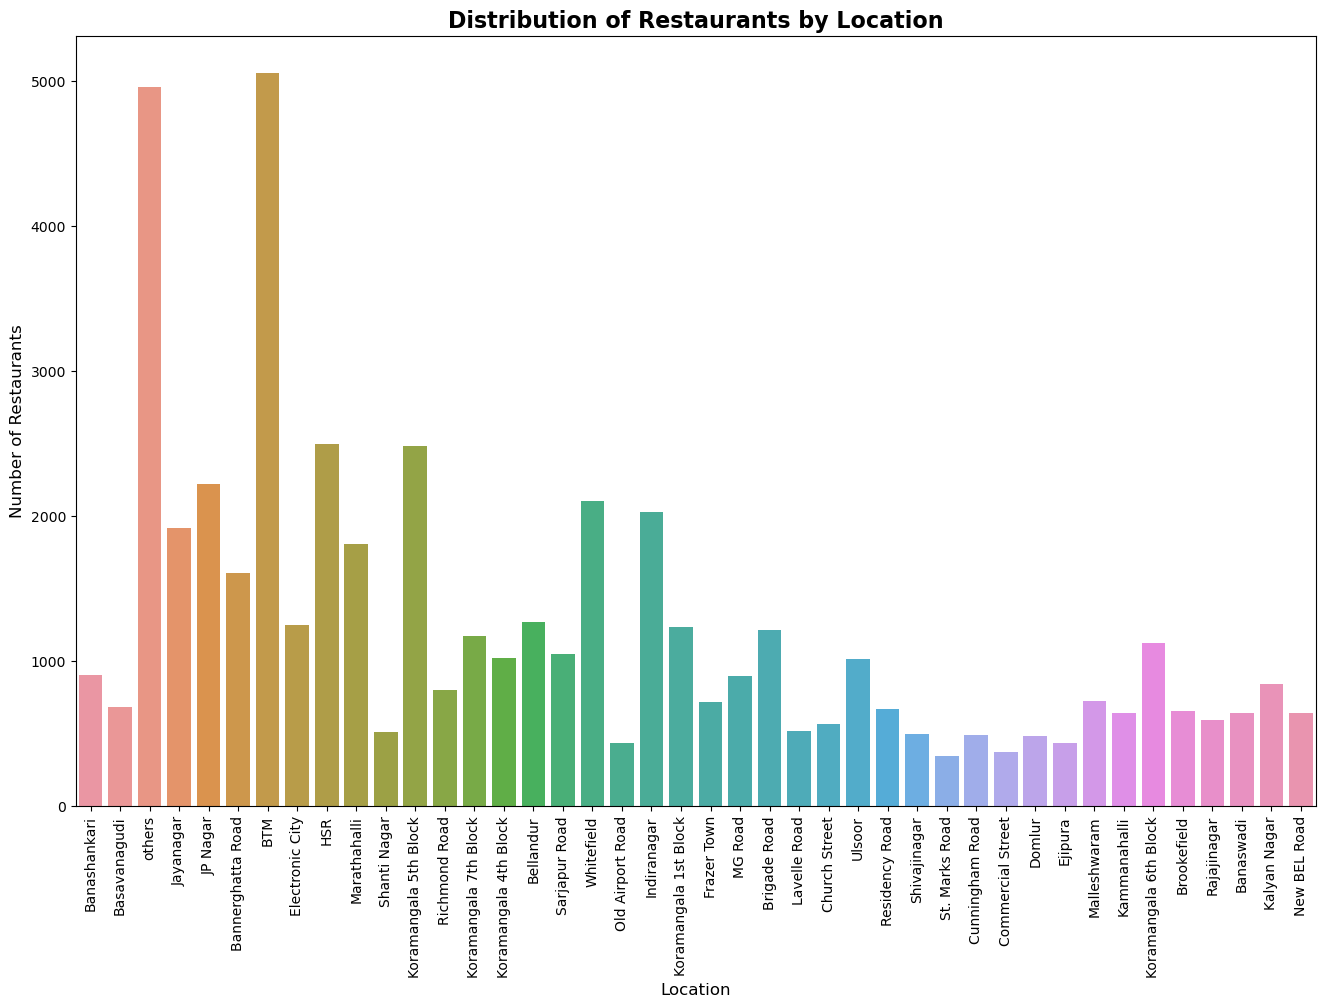

In [38]:
# number of restaurants per location
plt.figure(figsize=(16,10))
ax = sns.countplot(x=data['location'])
plt.xticks(rotation=90)
plt.title('Distribution of Restaurants by Location', fontsize=16, fontweight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.show()

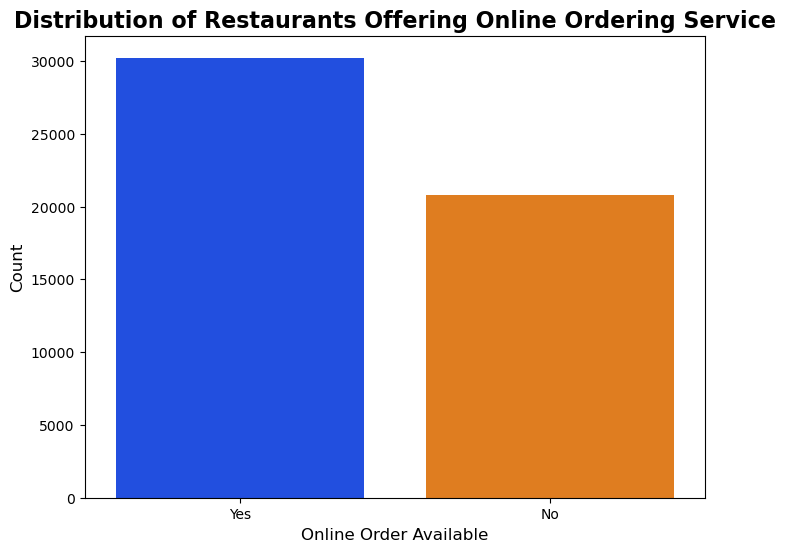

In [39]:
# Identifying the numbers of restaurants having online order service
plt.figure(figsize=(8,6))
ax = sns.countplot(x=data['online_order'], palette='bright')
plt.title('Distribution of Restaurants Offering Online Ordering Service', fontsize=16, fontweight='bold')
plt.xlabel('Online Order Available', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

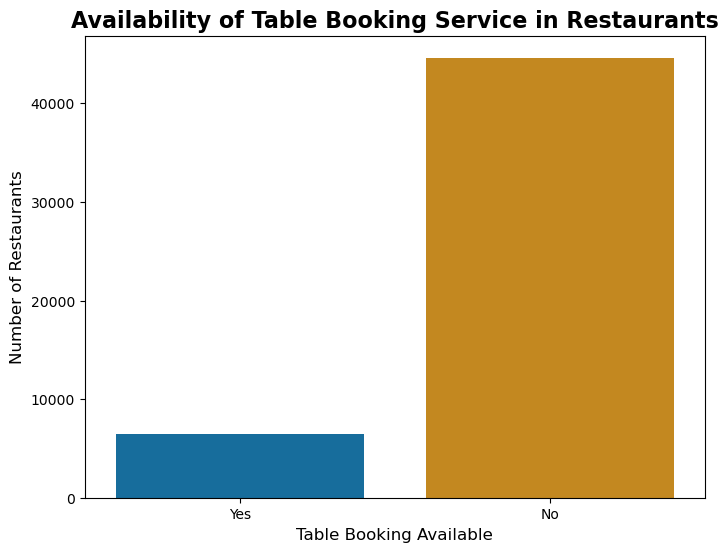

In [40]:
# identifying the table vooking services in restaurant
plt.figure(figsize=(8,6))
ax = sns.countplot(x=data['book_table'], palette='colorblind')
plt.title('Availability of Table Booking Service in Restaurants', fontsize=16, fontweight='bold')
plt.xlabel('Table Booking Available', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.show()


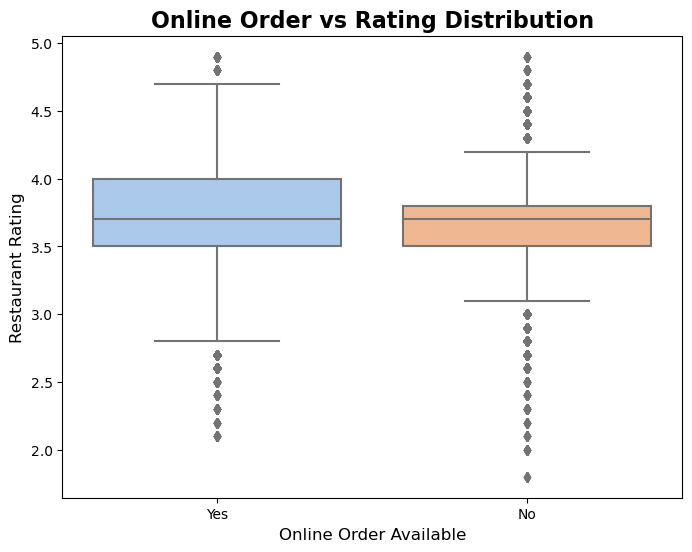

In [41]:
# Relationship Between Online Ordering Availability and Ratings
plt.figure(figsize=(8,6))
sns.boxplot(x='online_order', y='rate', data=data, palette='pastel')
plt.title('Online Order vs Rating Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Online Order Available', fontsize=12)
plt.ylabel('Restaurant Rating', fontsize=12)
plt.show()


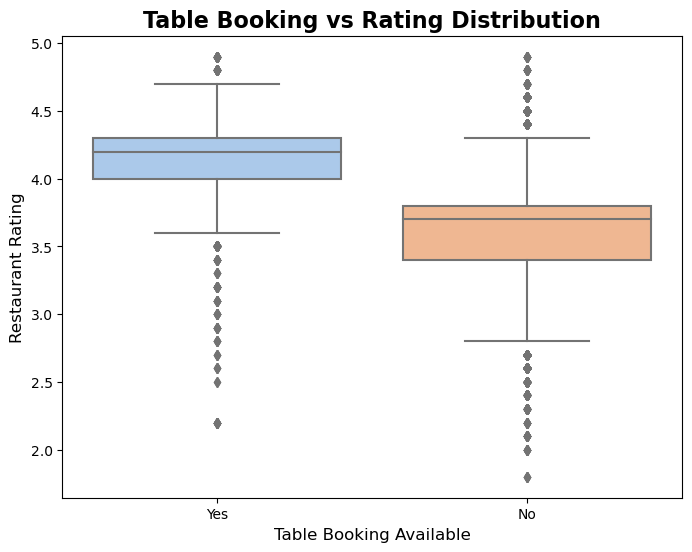

In [42]:
# Relationship Between Table Booking Availability and Ratings
plt.figure(figsize=(8,6))
sns.boxplot(x='book_table', y='rate', data=data, palette='pastel')
plt.title('Table Booking vs Rating Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Table Booking Available', fontsize=12)
plt.ylabel('Restaurant Rating', fontsize=12)
plt.show()


In [43]:
# Identifying how many restaurants are there in each location using group by
data1 = data.groupby(['location', 'online_order'])['name'].count()
data1

location      online_order
BTM           No              1763
              Yes             3293
Banashankari  No               397
              Yes              505
Banaswadi     No               302
                              ... 
Ulsoor        Yes              622
Whitefield    No               986
              Yes             1119
others        No              2064
              Yes             2890
Name: name, Length: 84, dtype: int64

Text(0.5, 1.0, 'Location wise online service')

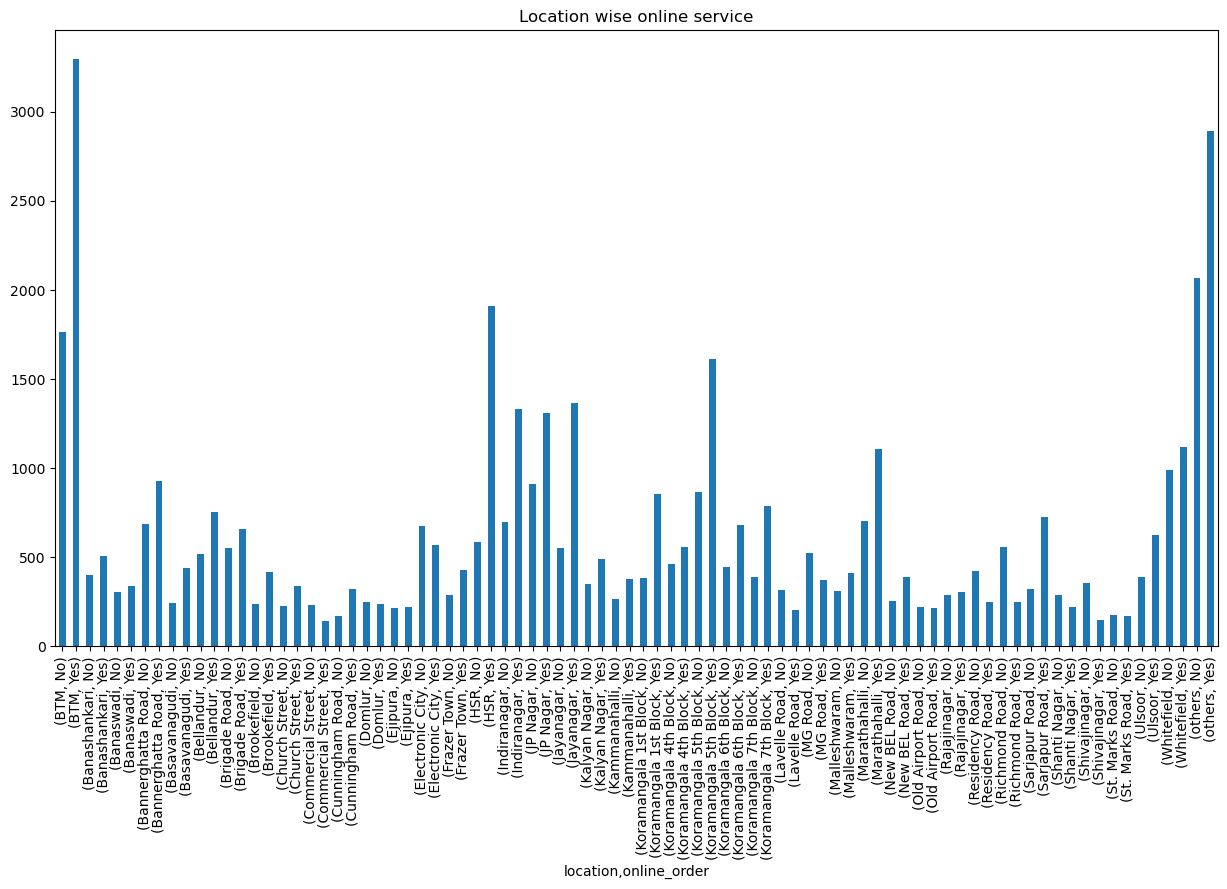

In [44]:
data1.plot(kind = 'bar', figsize = (15,8))
plt.title("Location wise online service")